# Conhecendo a metodologia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leitura de dados

# idade de aposentadoria
dados_idade_aposentadoria = pd.read_csv('/content/dados_idade_aposentadoria.csv')

# Tempo de vida de uma lâmpada
dados_vida_lampada = pd.read_csv('/content/dados_vida_lampada.csv')

# Altura dos funcionários
dados_alturas = pd.read_csv('/content/dados_alturas.csv')

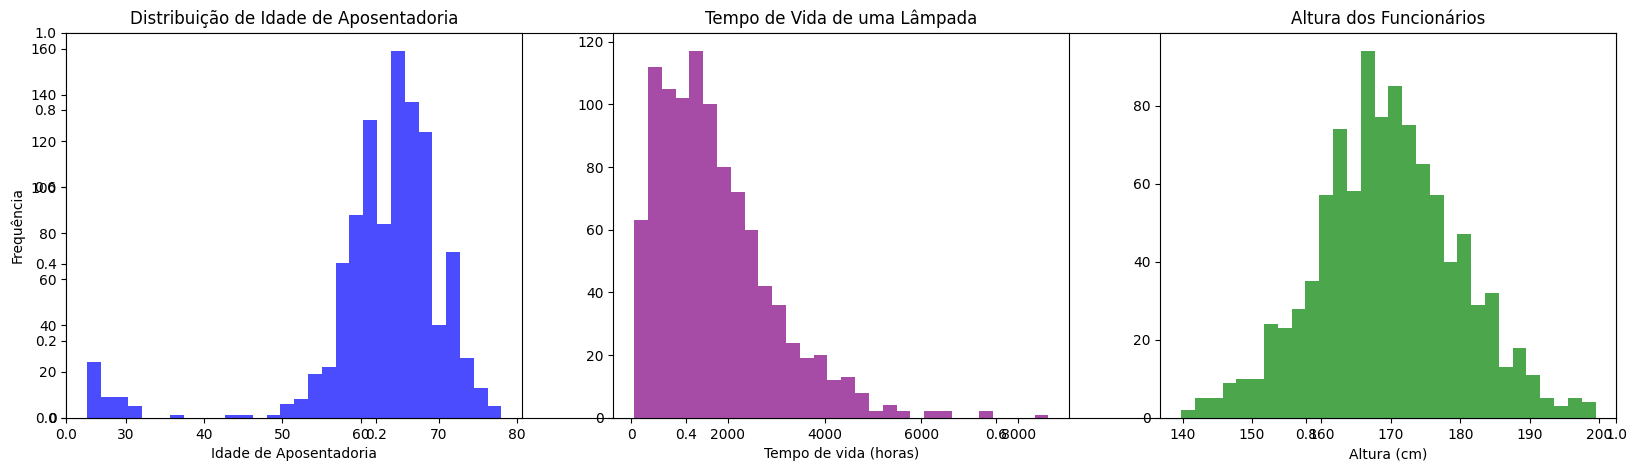

In [3]:
# Várias distribuições
plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Altura dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

In [4]:
# Reamostragem

# Tempo de amostra
n = 100

# Quantidade de amostras
qnt = 100000

# Função de reamostragem e cálculo de médias
def reamostragem_medias(dados, coluna, n, qnt):
  medias = [dados[coluna].sample(n, replace=True).mean()for _ in range(qnt)]
  return medias

In [5]:
# Realizando as reamostragens com a função
media_idade = reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qnt)
duracao_vida = reamostragem_medias(dados_vida_lampada, 'duracao', n, qnt)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qnt)

In [6]:
print('**** Médias populacionais ****')

print('idade:', dados_idade_aposentadoria['idade'].mean())
print('duração:', dados_vida_lampada['duracao'].mean())
print('altura:', dados_alturas['alturas'].mean())

**** Médias populacionais ****
idade: 62.70857142857143
duração: 1731.8036029420002
altura: 169.52022


In [7]:
def Average(lst):
  return sum(lst) / len(lst)

print('**** Médias populacionais ****')

print('idade:', Average(media_idade))
print('duração:', Average(duracao_vida))
print('altura:', Average(media_altura))

**** Médias populacionais ****
idade: 62.7058827
duração: 1731.544308836902
altura: 169.52195322700024


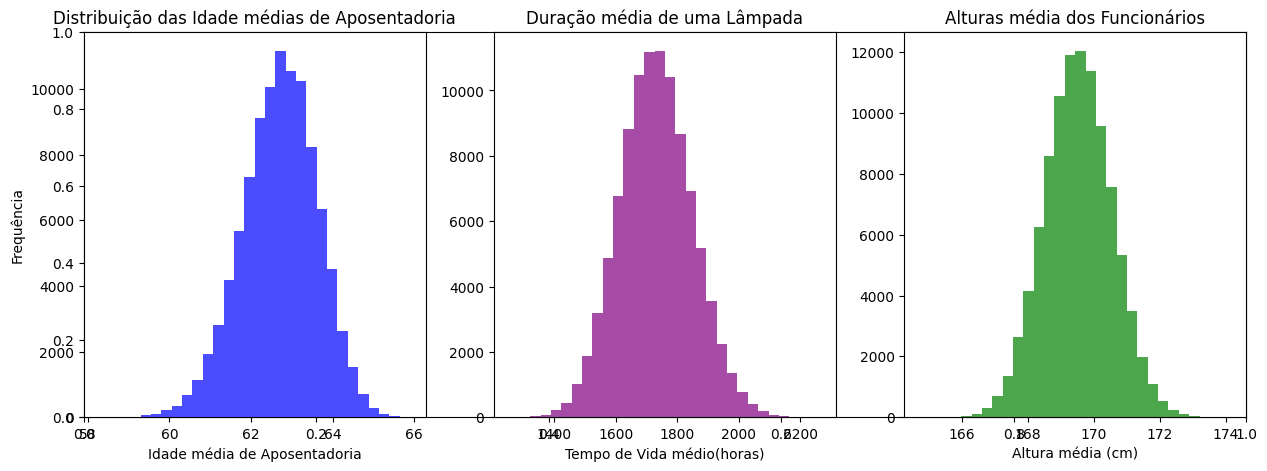

In [8]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(duracao_vida, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

In [9]:
# Média da nova amostra
media_por_amostra = 1200

In [10]:
# Média original
dados_vida_lampada['duracao'].mean()

1731.8036029420002

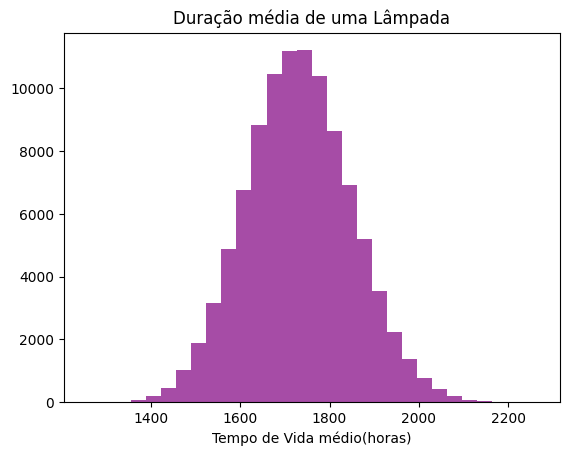

In [11]:
# Quão distante essa média está do comportamento?

plt.hist(duracao_vida, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_por_amostra, 0), xytext=(media_por_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [12]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': duracao_vida})

In [13]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1731.5443088368781
Erro Padrão: 118.36365973091401


In [14]:
# Quantos erros?
1732 - EP*3

1376.909020807258

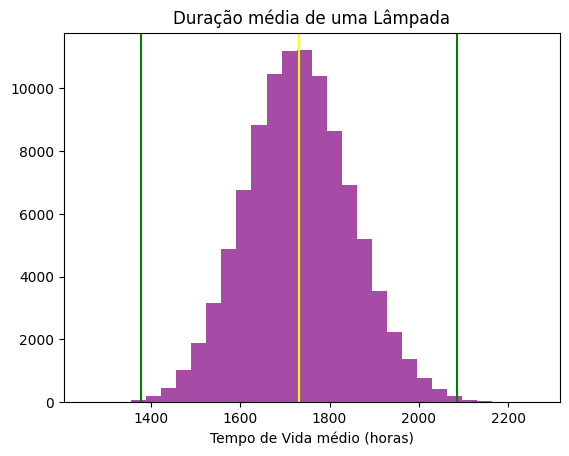

In [15]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(duracao_vida, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")
plt.axvline(media_das_medias + 3*EP , color = "green")
plt.axvline(media_das_medias - 3*EP , color = "green")
plt.annotate('.', xy=(media_por_amostra, 0), xytext=(media_por_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [16]:
#quanto está no intervalo de +ou- dois desvio
qnt_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                          (duracao_amostras < media_das_medias + 3*EP)]

# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()*100

,0
medias_duracao,99.731


In [17]:
# Importando o stats
from scipy import stats

In [18]:
# Levar a consideração essa amostra
dados_vida_lampada

# Nível de confiança definido
confianca = 0.95

In [19]:
# Informações para o IC

media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostral = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [20]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao_amostral/np.sqrt(tamanho_amostra))

In [21]:
# Visualizando os resultados
print('IC (95%):', intervalo_confianca)

IC (95%): (1658.3741665835485, 1805.233039300452)


# Teste para uma amostra grande

In [22]:
# Hipotese nula
hipotese = 1570

In [23]:
# Dados amostrais

lampadas_natalinas = pd.read_csv('/content/experimento_lampadas_natalinas.csv')

In [24]:
# Média amostral
lampadas_natalinas['duracao'].mean()

1529.5081310675512

In [25]:
# Informações para a região crítica
confianca = 0.95 # Nível de confiança desejado
desvio_padrao_populacional = 105 # sigma dado pela fábrica
tamanho_amostra = len(lampadas_natalinas['duracao'])

In [26]:
# Calcular o IC

intervalo = stats.norm.interval(confianca,
                                loc = 1570,
                                scale = desvio_padrao_populacional/np.sqrt(tamanho_amostra))
print('IC (95%): ', intervalo)

IC (95%):  (1549.4203781623294, 1590.5796218376706)


In [27]:
# Importar o teste Z do statsmodels
from statsmodels.stats.weightstats import ztest

In [28]:
# Ececutar o teste Z
stats, p_valor = ztest(x1 = lampadas_natalinas['duracao'], value = 1570, alternative= 'two-sided')

In [29]:
# Média amostral
lampadas_natalinas['duracao'].mean()

1529.5081310675512

In [30]:
# Exibir os resultados
print(p_valor)

0.0


In [31]:
# Verificar a hipótese nula com base no valor-p
if p_valor < 0.05:
  conclusao = 'Rejeitar a hipótese nula'
else:
  conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


# Teste para uma amostra pequena

In [32]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [33]:
# Média coletada do tempo
np.mean(tempo_resposta)

29.96

In [34]:
# Importar o ttest_1samp
from scipy.stats import ttest_1samp

In [35]:
# Realiza o teste t unilateral para uma amostra
stats, p_valor = ttest_1samp(tempo_resposta, 30, alternative = "less")

In [36]:
print(p_valor)

0.4585970095667924


In [37]:
nivel_significancia = 0.05

if p_valor < nivel_significancia:
  conclusao = 'Rejeitar a hipótese nula'
else:
  conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Não rejeitar a hipótese nula


# Testar para duas amostras

In [38]:
# Vendas com propaganda
vendas_com_propaganda = [329.80, 291.70, 338.86, 391.38,
                         285.95, 285.95, 394.75, 346.05,
                         271.83, 332.55, 272.19, 272.06,
                         314.52, 185.20, 196.50, 266.26,
                         239.23, 318.85, 245.52, 215.26,
                         387.94, 286.45, 304.05, 214.52,
                         267.34, 306.66, 230.94, 322.54,
                         263.96, 282.50, 263.90, 411.14,
                         299.19, 236.54, 349.35, 226.75,
                         312.53, 182.42, 220.31, 311.81,
                         344.31, 310.28, 293.66, 281.93,
                         211.29, 256.81, 272.36, 363.43,
                         320.62, 194.22]

In [39]:
# Vendas com propaganda
vendas_sem_propaganda = [304.44, 261.89, 244.38, 321.70,
                         346.86, 348.08, 234.65, 266.45,
                         304.88, 343.53, 256.25, 273.86,
                         218.62, 213.23, 333.75, 366.37,
                         280.68, 345.21, 306.70, 246.29,
                         306.68, 377.28, 282.85, 378.88,
                         127.82, 334.31, 290.22, 267.06,
                         290.51, 165.74, 271.82, 306.43,
                         373.67, 253.90, 236.49, 254.89,
                         339.92, 304.73, 253.21, 315.80,
                         292.80, 343.12, 242.88, 265.34,
                         261.47, 197.19, 302.77, 300.66,
                         285.31, 270.92]

In [40]:
# Média de com propaganda
print(np.mean(vendas_com_propaganda))
# Média de sem propaganda
print(np.mean(vendas_sem_propaganda))

286.4832
286.2498


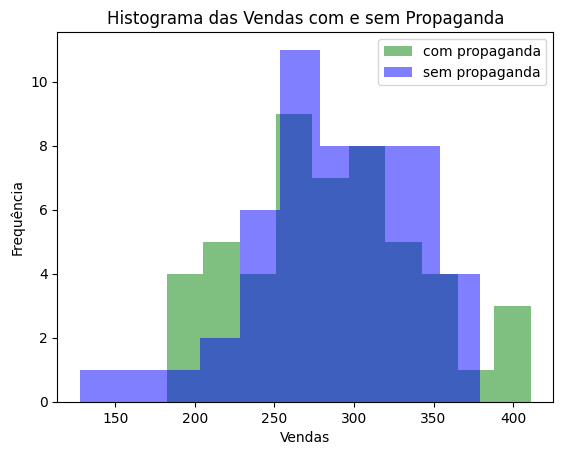

In [41]:
# Criar histograma
plt.hist(vendas_com_propaganda, color='green', alpha=0.5, label='com propaganda')
plt.hist(vendas_sem_propaganda, color='blue', alpha=0.5, label='sem propaganda')

# Adicionar rótulos e títulos
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas com e sem Propaganda')
plt.legend()
plt.show()

In [42]:
# Teste T para amostras independentes  (ttest_ind)
from scipy.stats import ttest_ind

In [43]:
# Aplicação do teste T de Student
stats, p_valor = ttest_ind(vendas_com_propaganda, vendas_sem_propaganda, alternative='greater')

In [44]:
# Exibir os resultados
print(p_valor)

0.49145652153110797


In [45]:
# Interpretar os resultados

alpha = 0.05
if p_valor < alpha:
    print("Rejeitar a hipótese nula: Há evidências de que a propaganda tem um efeito positivo nas vendas.")
else:
    print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.")

Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.


In [46]:
antes_do_treinamento =[78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
apos_o_treinamento = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [47]:
# Comparando antes e depois
resultado_subtracao = [b - a for a, b in zip(antes_do_treinamento,apos_o_treinamento)]

In [48]:
resultado_subtracao

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]

In [49]:
# Importar o teste pareado ttest_rel
from scipy.stats import ttest_rel

In [50]:
# Aplicando o teste pareado ttest_rel
stats, p_valor = ttest_rel(apos_o_treinamento, antes_do_treinamento, alternative="greater")

In [51]:
# Exibir os resultados
print(p_valor)

0.000627744161772394


# Testes não paramétricos

In [52]:
# Dados de desempenho dos dois grupos
treino_a = [5, 3, 8, 4, 6]
treino_b = [4, 2, 7, 5, 3]

In [53]:
# Importar teste mannwhitneyu
from scipy.stats import mannwhitneyu

In [55]:
# Aplicar o teste de Mann-Whitney
stats, p_valor = mannwhitneyu (treino_a, treino_b, alternative = "two-sided")

In [56]:
print(p_valor)

0.4605966187047713


In [57]:
# Preferências dos consumidores antes e depois da mudança no layout
preferencias_antes = [4, 2, 5, 2, 5, 6, 7, 8, 9, 10 ]
preferencias_depois = [8, 5, 3, 5, 8, 9, 9, 9, 10, 9]

In [58]:
#diferenças de percepção
resultado_subtracao = [b - a for a, b in zip(preferencias_antes,preferencias_depois)]

In [60]:
resultado_subtracao

[4, 3, -2, 3, 3, 3, 2, 1, 1, -1]

In [59]:
np.mean(resultado_subtracao)

1.7

In [61]:
np.median(resultado_subtracao)

2.5

In [62]:
from scipy.stats import wilcoxon

In [63]:
stats, p_valor = wilcoxon(preferencias_depois, preferencias_antes, alternative="greater")

In [64]:
print(p_valor)

0.0185546875


In [65]:
nivel_significancia=0.05

if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"
conclusao

'Rejeitar a hipótese nula'